In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "low_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  
%run -i /home/cz136/project/sa/lib/src/corr_func.py  

In [4]:
# z_diff=float(z_diff)

In [5]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [6]:
if vol!="uber":
    members=shapes

In [7]:
if quantile!="":
    i=int(quantile)

In [8]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [9]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [10]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [11]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [12]:
NBINS=10

In [13]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [14]:
len(shapes)

15411

In [15]:
len(members)

15411

In [16]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [17]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

20it [00:00, 199.79it/s]

42it [00:00, 203.24it/s]

64it [00:00, 206.71it/s]

86it [00:00, 209.35it/s]

105it [00:00, 201.73it/s]

127it [00:00, 206.35it/s]

149it [00:00, 209.17it/s]

171it [00:00, 212.06it/s]

194it [00:00, 214.40it/s]

216it [00:01, 215.18it/s]

238it [00:01, 215.37it/s]

260it [00:01, 209.60it/s]

281it [00:01, 204.88it/s]

302it [00:01, 206.23it/s]

324it [00:01, 209.58it/s]

346it [00:01, 212.08it/s]

369it [00:01, 216.08it/s]

392it [00:01, 218.68it/s]

414it [00:01, 211.01it/s]

436it [00:02, 210.27it/s]

458it [00:02, 212.95it/s]

481it [00:02, 215.47it/s]

503it [00:02, 216.21it/s]

525it [00:02, 216.58it/s]

547it [00:02, 216.94it/s]

553it [00:02, 212.51it/s]


0it [00:00, ?it/s]

23it [00:00, 226.16it/s]

Number of empty sat catalogs is 0


44it [00:00, 219.21it/s]

66it [00:00, 219.30it/s]

90it [00:00, 222.48it/s]

113it [00:00, 224.53it/s]

136it [00:00, 225.78it/s]

160it [00:00, 227.15it/s]

183it [00:00, 226.66it/s]

207it [00:00, 228.34it/s]

231it [00:01, 229.58it/s]

255it [00:01, 231.39it/s]

279it [00:01, 232.09it/s]

303it [00:01, 232.68it/s]

327it [00:01, 232.54it/s]

351it [00:01, 224.93it/s]

375it [00:01, 226.70it/s]

398it [00:01, 224.91it/s]

421it [00:01, 224.75it/s]

444it [00:01, 224.23it/s]

467it [00:02, 225.71it/s]

491it [00:02, 227.00it/s]

515it [00:02, 227.99it/s]

539it [00:02, 228.79it/s]

553it [00:02, 226.73it/s]

Number of empty sat catalogs is 0


In [18]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [19]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

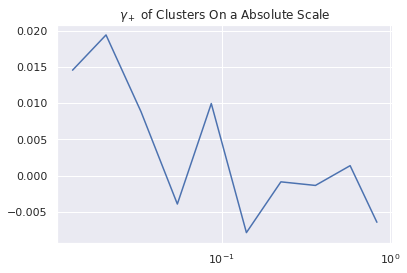

Aggregated xi:
[-1.2092 -3.48   -2.5129  1.9871 -9.1424 12.1608  2.0883  4.4762 -5.1222
 12.1709]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -359.623   -693.9125  -968.7822 -1466.7827 -2241.7575 -3027.593
 -3597.9545 -3357.0817 -2057.7562  -348.742 ]
------------------------------------------------------------------------------
Aggregated npairs:
[  83.  179.  285.  505.  918. 1542. 2409. 3282. 3742. 1885.]
------------------------------------------------------------------------------
Mean xi:
[-0.0146 -0.0194 -0.0088  0.0039 -0.01    0.0079  0.0009  0.0014 -0.0014
  0.0065]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3328 -3.8766 -3.3992 -2.9045 -2.442  -1.9634 -1.4935 -1.0229 -0.5499
 -0.185 ]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

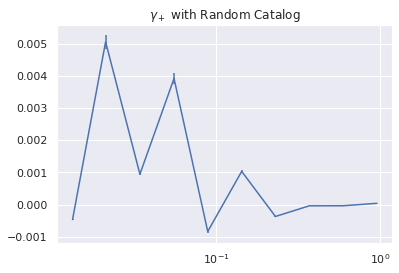

[-4.6180e-04  5.0577e-03  9.4782e-04  3.9211e-03 -8.3240e-04  1.0338e-03
 -3.6639e-04 -3.5451e-05 -3.3461e-05  4.2813e-05]
[ 1.9638e-05 -2.1507e-04 -4.0305e-05 -1.6674e-04  3.5397e-05 -4.3961e-05
  1.5580e-05  1.5076e-06  1.4229e-06 -1.8206e-06]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

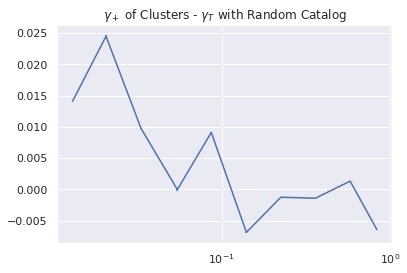

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

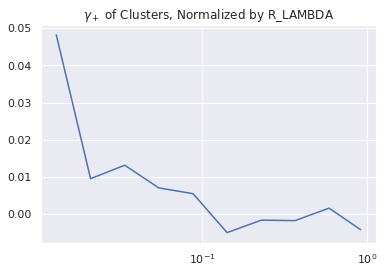

Aggregated xi:
[-2.0248 -1.3039 -3.0624 -2.564  -3.9701  6.3123  3.2836  5.2667 -5.8135
 14.4879]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -182.4336  -529.3984  -789.2604 -1059.5778 -1762.7262 -2470.3559
 -2959.4107 -3002.4463 -1940.1099  -303.9192]
------------------------------------------------------------------------------
Aggregated npairs:
[  42.  137.  233.  364.  725. 1263. 2004. 2982. 3660. 3433.]
------------------------------------------------------------------------------
Mean xi:
[-0.0482 -0.0095 -0.0131 -0.007  -0.0055  0.005   0.0016  0.0018 -0.0016
  0.0042]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3437 -3.8642 -3.3874 -2.9109 -2.4313 -1.9559 -1.4768 -1.0069 -0.5301
 -0.0885]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)